In [1]:
import numpy as np
import json 
# import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

In [139]:
# exp0.01

In [2]:
#val Results: Prec@1 72.880 Prec@5 90.860 Loss 11.49829
#val Class Accuracy: [0.943,0.987,0.908,0.894,0.941,0.359,0.587,0.508,0.522,0.639]
#Best Prec@1: 79.180
cifar10_step_0_01_H_MM_LDAM_DRW = [0.936,0.969,0.842,0.739,0.906,0.703,0.777,0.686,0.615,0.745]
cifar10_step_0_01_H_MM_LDAM_DRW = np.array(cifar10_step_0_01_H_MM_LDAM_DRW)
err_H_MM_LDAM_DRW = cifar10_step_0_01_H_MM_LDAM_DRW.sum() / 10

print(err_H_MM_LDAM_DRW)

0.7918000000000001


In [3]:
# cifar10_resnet32_Unbiased_Unbiased_exp_0.01_none_scale_30.0_max_m_1.4_gamma_1.4_seed_1
#val Results: Prec@1 71.150 Prec@5 96.990 Loss 4.94027
#val Class Accuracy: [0.968,0.986,0.833,0.769,0.820,0.617,0.713,0.563,0.382,0.464]
#Best Prec@1: 72.460
cifar10_exp_0_01_HMM = [0.968,0.986,0.833,0.769,0.820,0.617,0.713,0.563,0.382,0.464]

In [4]:
# step0.01
cifar10_step_0_01_CB_RW = [0.154, 0.07, 0.32, 0.26, 0.23, 0.76, 0.52, 0.61, 0.50, 0.382 ]
cifar10_step_0_01_CB_RW = 1 - np.array(cifar10_step_0_01_CB_RW)
err_CB_RW = 1 - cifar10_step_0_01_CB_RW.sum() / 10

print(err_CB_RW)

0.38060000000000005


In [5]:
# step0.01
cifar10_step_0_01_LDM_DRW = [0.059, 0.019, 0.138, 0.259, 0.068, 0.386, 0.317, 0.441, 0.346, 0.264]
cifar10_step_0_01_LDM_DRW = 1 - np.array(cifar10_step_0_01_LDM_DRW)
err_LDM_DRW = 1 - cifar10_step_0_01_LDM_DRW.sum() / 10

print(err_LDM_DRW)

0.22970000000000002


In [7]:
#val Results: Prec@1 77.170 Prec@5 98.110 Loss 6.04578
#val Class Accuracy: [0.935,0.978,0.865,0.802,0.940,0.523,0.725,0.619,0.643,0.687]
#Best Prec@1: 77.170
cifar10_step_0_01_HMM_DRW = [0.935,0.978,0.865,0.802,0.940,0.523,0.725,0.619,0.643,0.687]

In [8]:
num_classes = len(cifar10_step_0_01_HMM_DRW)
VG_dicts = ['c{}'.format(idx) for idx in range(num_classes)]

### Load Logs

In [9]:
cifar10_exp_0_01_HMM = np.array(cifar10_exp_0_01_HMM)

cifar10_step_0_01_HMM_DRW = np.array(cifar10_step_0_01_HMM_DRW)

VG_dicts = np.array(VG_dicts)
pred_idx = range(len(VG_dicts))

In [147]:
def createDataFrame(catIds, AP, model_name, VG_dicts): 
    cat = [VG_dicts[idx] for idx in catIds] 
    df = pd.DataFrame(list(zip(catIds, cat, AP)), columns=['catIds', 'category', 'accuray'], index=None)
    df['model'] = model_name
    return df

In [164]:
def drawApDiff(baseline_AP, target_AP, VG_dicts=VG_dicts, top_k=10): 
    Ap_diff = target_AP - baseline_AP 
    
    if False:
        sorted_args = np.flip(np.argsort(np.abs(Ap_diff[1:])), 0)[:top_k] + 1
        sorted_args = np.insert(sorted_args, 0, 0)
    else:
        sorted_args = pred_idx
        
    if True:
        baseline_top_k = baseline_AP
        target_top_k = target_AP
    else:
        baseline_top_k = baseline_AP[sorted_args]
        target_top_k = target_AP[sorted_args]
    
    baseline_df = createDataFrame(sorted_args, baseline_top_k, 'CB-RW', VG_dicts)
    target_df = createDataFrame(sorted_args, target_top_k, 'MM-DRW', VG_dicts)
    
    df = baseline_df.append(target_df)
    
    plt.rcParams["axes.labelsize"] = 25
    plt.rcParams['xtick.labelsize'] = 25
    plt.rcParams['ytick.labelsize'] = 25 
    plt.rcParams['font.size'] = 25
    
    fig, ax = plt.subplots(figsize=(top_k, 4), dpi=300)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
    
    #plt.setp( ax.get_legend(),fontsize='large')
    sns.set()
    g = sns.barplot(data=df, x='category', y='accuray', hue='model', ax=ax)
    #for p in g.patches:
    #    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=45, fontsize='x-small')
    return df, g

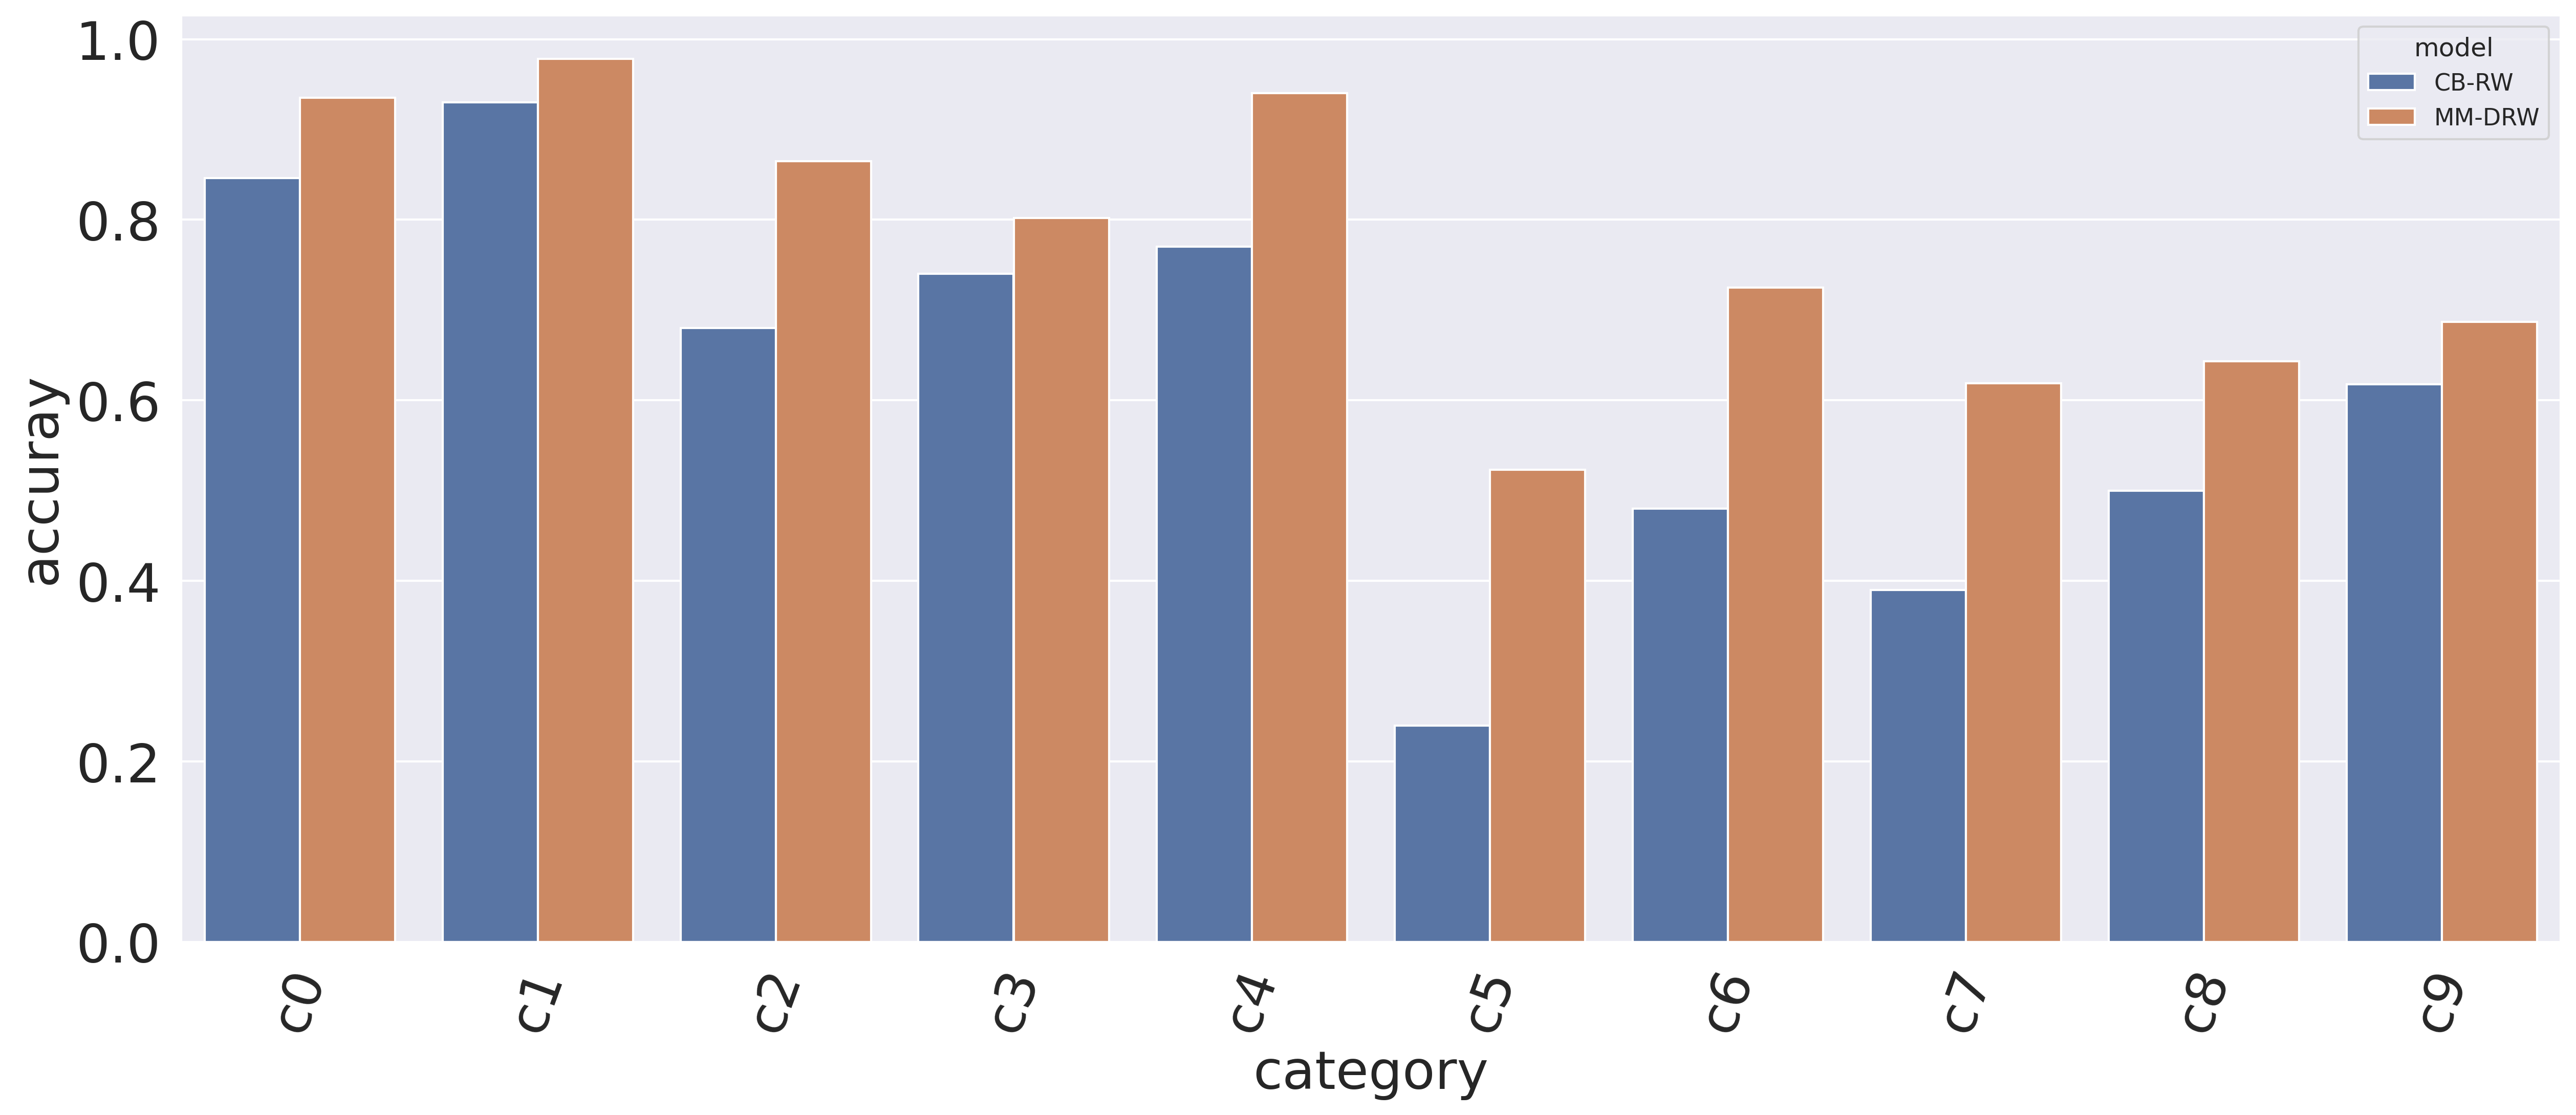

In [165]:
df, g = drawApDiff(cifar10_step_0_01_CB_RW, cifar10_step_0_01_HMM_DRW, top_k=20)
fig = g.get_figure()
fig.set_size_inches(20, 8)
fig.savefig('./acc.png')

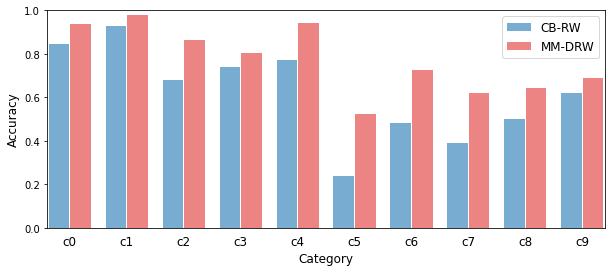

In [25]:
baseline_AP = cifar10_step_0_01_CB_RW
target_AP = cifar10_step_0_01_HMM_DRW
labels = [f'c{i}' for i in range(10)]


x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
space = 0.02

fig, ax = plt.subplots()
rects1 = plt.bar(x - width/2, baseline_AP, width - space, label='CB-RW', color='#78ACD1')
rects2 = plt.bar(x + width/2, target_AP, width -space, label='MM-DRW', color='#ed8484')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Category', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
plt.ylim(0, 1)
plt.xlim(-0.4, len(labels) - 1 + 0.4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.legend(fontsize=12)
fig.set_size_inches(10, 4)
plt.savefig('cifar10.pdf', format='pdf')
plt.show()

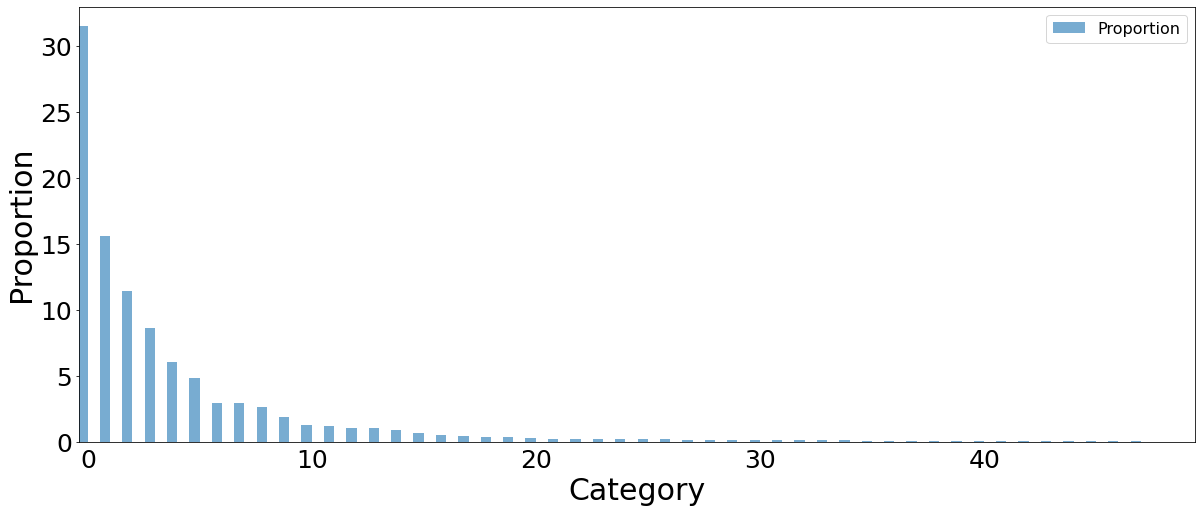

In [53]:
vg_cls_prop = [31.55, 15.65, 11.42, 8.63, 6.08, 4.87, 2.95, 2.91, 2.65, 1.86, 1.28, 1.20, 1.07,
              1.01, 0.9, 0.65, 0.48, 0.43, 0.40, 0.37, 0.30, 0.24, 0.22, 0.21, 0.20, 0.187, 0.183, 
               0.171, 0.150, 0.133, 0.132, 0.123, 0.113, 0.110, 0.100, 0.09, 0.088, 0.083, 0.078, 
              0.068, 0.058, 0.051, 0.049, 0.048, 0.042, 0.028,0.027, 0.026, 0.010, 0.005]

baseline_AP = np.array(vg_cls_prop)

labels = [f'c{i}' for i in range(len(vg_cls_prop))]


x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
space = 0.04

fig, ax = plt.subplots()
rects1 = plt.bar(x - width/2, baseline_AP, width - space, label='Proportion', color='#78ACD1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion', fontsize=30)
ax.set_xlabel('Category', fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 

#ax.set_xticklabels(labels, fontsize=16)
plt.ylim(0, 33)
plt.xlim(-0.4, len(labels) - 1 + 0.4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.legend(fontsize=16)
fig.set_size_inches(20, 8)
plt.savefig('vg.pdf', format='pdf')
plt.show()

In [43]:
def drawApMulti(baseline_AP, udirg_AP, dirg_AP,target_AP, VG_dicts=VG_dicts, top_k=10): 
    Ap_diff = target_AP - baseline_AP 
    
    sorted_args = np.flip(np.argsort(np.abs(Ap_diff[1:])))[:top_k] + 1
    sorted_args = np.insert(sorted_args, 0, 0)
    baseline_top_k = baseline_AP[sorted_args]
    arte_top_k = target_AP[sorted_args]
    udirg_top_k = udirg_AP[sorted_args]
    dirg_top_k = dirg_AP[sorted_args]
    
    baseline_df = createDataFrame(sorted_args, baseline_top_k, 'baseline', VG_dicts)
    udirg_df = createDataFrame(sorted_args, udirg_top_k, 'undirect', VG_dicts)
    dirg_df = createDataFrame(sorted_args, dirg_top_k, 'direct', VG_dicts)    
    arte_df = createDataFrame(sorted_args, arte_top_k, 'AOE (ours)', VG_dicts)
    
    df = baseline_df.append(udirg_df)
    df = df.append(dirg_df)
    df = df.append(arte_df)
    
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20 
    
    #fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
    fig, ax = plt.subplots(figsize=(40, 10), dpi=800) #600
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
    sns.set()
    g = sns.barplot(data=df, x='category', y='AP', hue='model', ax=ax)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points', rotation=70, fontsize='large')
    return df, g

In [22]:
df, g = drawApMulti(baseline_AP,udirg_AP,dirg_AP,current_AP, top_k=50)
fig = g.get_figure()
fig.savefig('./mAP/mAP_top50.png')

NameError: name 'baseline_AP' is not defined